In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from pickle import dump

In [2]:
# 读取数据
dataset = pd.read_csv('D:\IPython\Corrosion-ML./Corrosion_current_density.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 318
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   304 non-null    int64  
 1   Composition  304 non-null    object 
 2   Environment  304 non-null    int64  
 3   PH           304 non-null    float64
 4   [Cl-]        304 non-null    float64
 5   [SO42-]      304 non-null    float64
 6   VEC          304 non-null    float64
 7   σVEC         304 non-null    float64
 8   ΔSmix        304 non-null    float64
 9   ΔHmix        304 non-null    float64
 10  Ω            304 non-null    float64
 11  δ            304 non-null    float64
 12  rbar         304 non-null    float64
 13  Δχ           304 non-null    float64
 14  χbar         304 non-null    float64
 15  e/a          304 non-null    float64
 16  Tm           304 non-null    float64
 17  σT           304 non-null    float64
 18  Ec           304 non-null    float64
 19  Al      

In [3]:
# 去掉不必要的轴
dataset = dataset.drop('Composition', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)


dataset.isna().sum()

Environment    0
PH             0
[Cl-]          0
[SO42-]        0
VEC            0
σVEC           0
ΔSmix          0
ΔHmix          0
Ω              0
δ              0
rbar           0
Δχ             0
χbar           0
e/a            0
Tm             0
σT             0
Ec             0
Al             0
Co             0
Cr             0
Fe             0
Ni             0
Cu             0
Ti             0
V              0
Si             0
Mn             0
Mo             0
Nb             0
Hf             0
Ta             0
Zr             0
C              0
Sn             0
P              0
B              0
W              0
Y              0
icorr          0
dtype: int64

In [4]:
# 去掉有空白的行
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 318
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  304 non-null    int64  
 1   PH           304 non-null    float64
 2   [Cl-]        304 non-null    float64
 3   [SO42-]      304 non-null    float64
 4   VEC          304 non-null    float64
 5   σVEC         304 non-null    float64
 6   ΔSmix        304 non-null    float64
 7   ΔHmix        304 non-null    float64
 8   Ω            304 non-null    float64
 9   δ            304 non-null    float64
 10  rbar         304 non-null    float64
 11  Δχ           304 non-null    float64
 12  χbar         304 non-null    float64
 13  e/a          304 non-null    float64
 14  Tm           304 non-null    float64
 15  σT           304 non-null    float64
 16  Ec           304 non-null    float64
 17  Al           304 non-null    float64
 18  Co           304 non-null    float64
 19  Cr      

In [5]:
# 将数据分成X和y
y = dataset['icorr']
X = dataset.drop(['icorr'], axis=1)

# Pearson Correlation Analysis

# 仅经验参数和环境因素

<Figure size 1000x800 with 0 Axes>

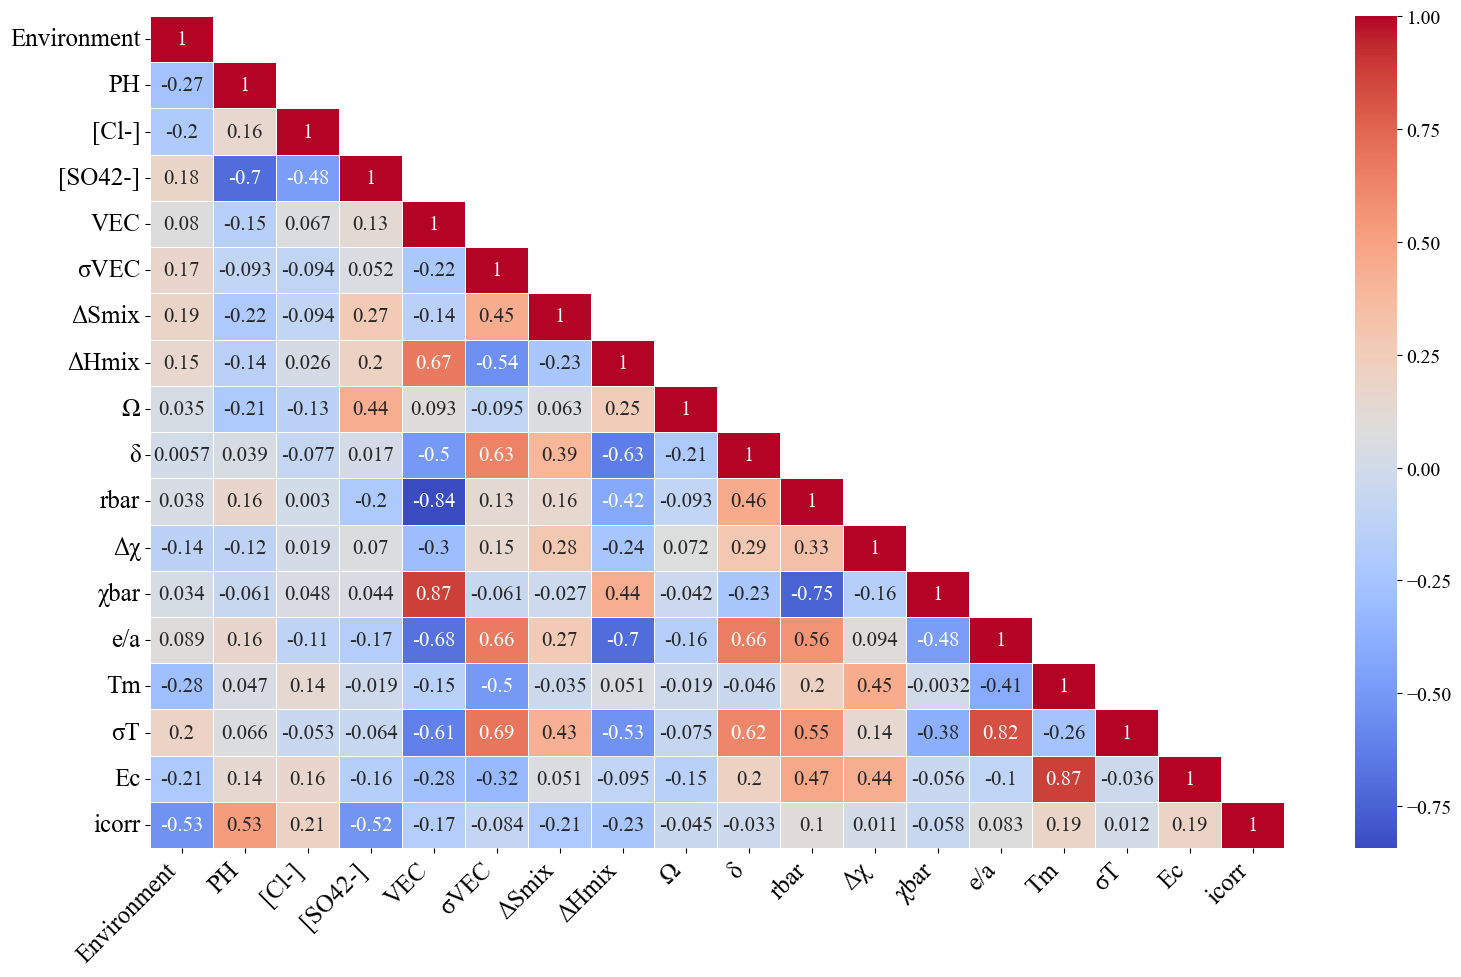

In [6]:
# 生成Pearson相关系数矩阵
P = dataset[['Environment', 'PH', '[Cl-]', '[SO42-]', 'VEC', 'σVEC', 'ΔSmix', 'ΔHmix', 'Ω', 'δ', 'rbar', 'Δχ', 'χbar', 'e/a', 'Tm', 'σT', 'Ec', 'icorr']]
corr=P.corr(method='pearson')

# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# 生成一个和相关系数矩阵相同大小的矩阵，并把它的主对角线上的元素设为1
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# 绘制相关系数矩阵的热力图
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 15}, mask=mask)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.tight_layout()
plt.show()

In [7]:
# 根据相关系数选择特征
threshold = 0.8  # 设置相关系数阈值
high_corr = np.where(abs(corr) > threshold)
high_corr = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print('Highly correlated features:', high_corr)

Highly correlated features: [('VEC', 'rbar'), ('VEC', 'χbar'), ('e/a', 'σT'), ('Tm', 'Ec')]


In [8]:
# 根据Pearson相关性分析结果，剔除一些特征参数
dataset = dataset.drop('rbar', axis=1)
dataset = dataset.drop('χbar', axis=1)
dataset = dataset.drop('σT', axis=1)
dataset = dataset.drop('Ec', axis=1)

# 仅包含成分

<Figure size 1000x800 with 0 Axes>

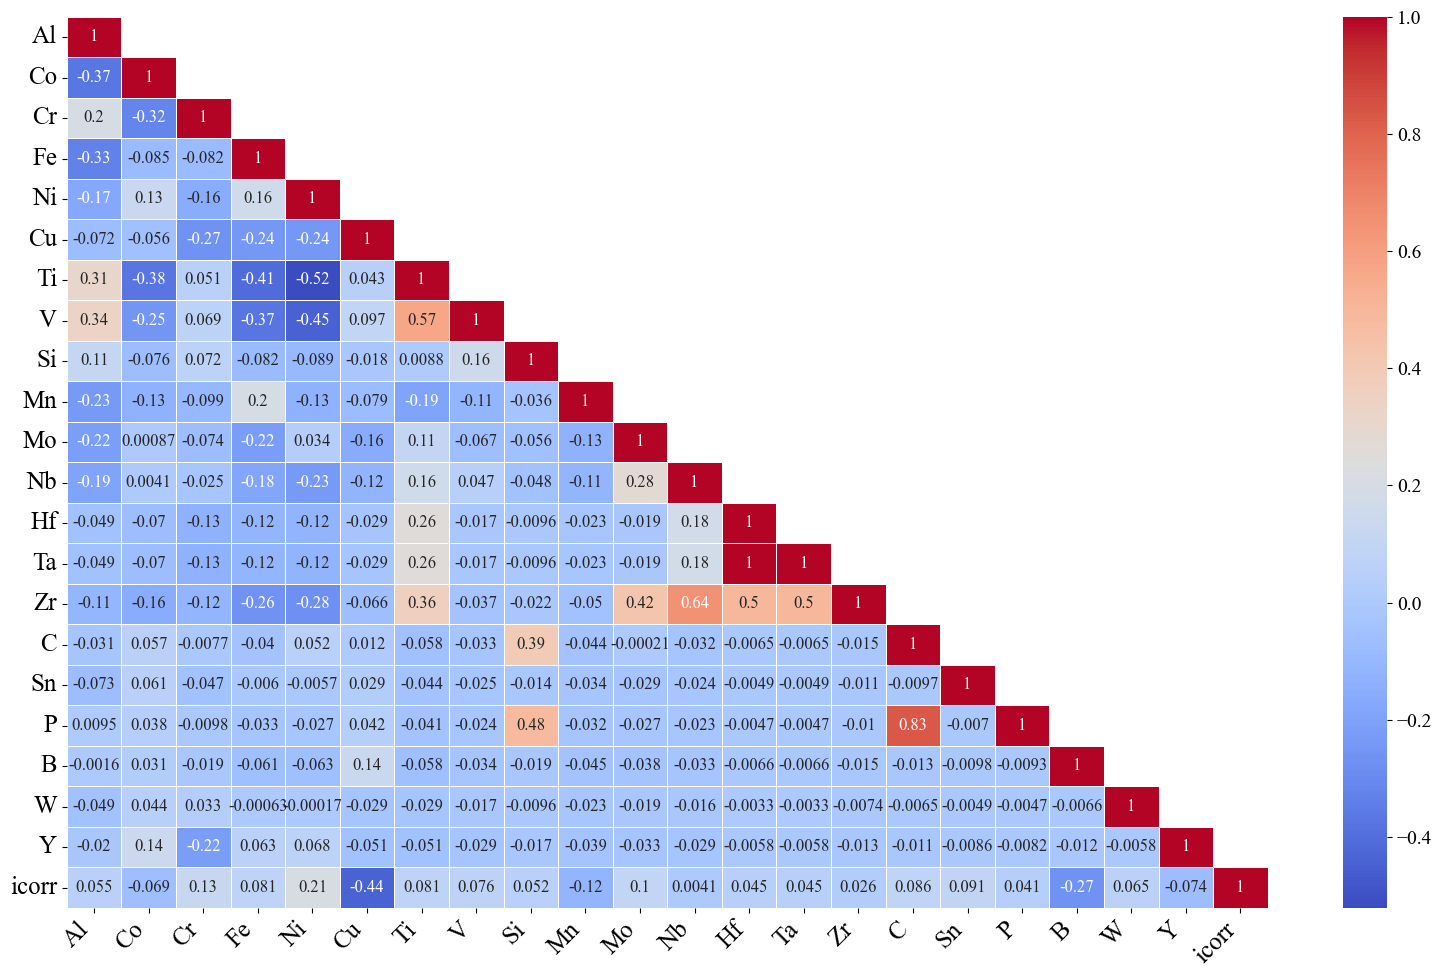

In [9]:
# 生成Pearson相关系数矩阵
P = dataset[['Al', 'Co', 'Cr', 'Fe', 'Ni', 'Cu', 'Ti', 'V', 'Si', 'Mn', 'Mo', 'Nb', 'Hf', 'Ta', 'Zr', 'C', 'Sn', 'P', 'B', 'W', 'Y', 'icorr']]
corr=P.corr(method='pearson')

# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# 生成一个和相关系数矩阵相同大小的矩阵，并把它的主对角线上的元素设为1
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# 绘制相关系数矩阵的热力图
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12}, mask=mask)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.tight_layout()
plt.show()

In [10]:
# 根据相关系数选择特征
threshold = 0.8  # 设置相关系数阈值
high_corr = np.where(abs(corr) > threshold)
high_corr = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print('Highly correlated features:', high_corr)

Highly correlated features: [('Hf', 'Ta'), ('C', 'P')]


In [11]:
# 根据Pearson相关性分析结果，剔除一些特征参数
dataset = dataset.drop('Hf', axis=1)
dataset = dataset.drop('Ta', axis=1)
dataset = dataset.drop('P', axis=1)

# 随机森林模型特征重要性分析

In [12]:
from sklearn.model_selection import train_test_split


# 将数据分成X和y轴
y = dataset['icorr']
X = dataset.drop(['icorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150,
                                                    )

# 归一化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

各特征的重要性分布： [7.33568053e-02 3.68057571e-01 2.51840314e-02 1.97087789e-03
 1.94501868e-02 1.65908488e-02 1.55990607e-02 2.44690662e-02
 1.67674386e-02 5.91924856e-02 4.83250433e-02 2.12582913e-02
 2.31541444e-02 1.26792206e-02 2.22902351e-02 9.18221716e-02
 2.14067177e-02 3.82283250e-02 4.90327625e-02 2.80638452e-02
 1.25929582e-03 1.33712657e-03 6.88664660e-03 1.14921171e-03
 9.46106427e-03 3.55717410e-05 2.45283491e-04 1.13569465e-03
 1.16772723e-03 3.29193939e-05 3.90329380e-04]


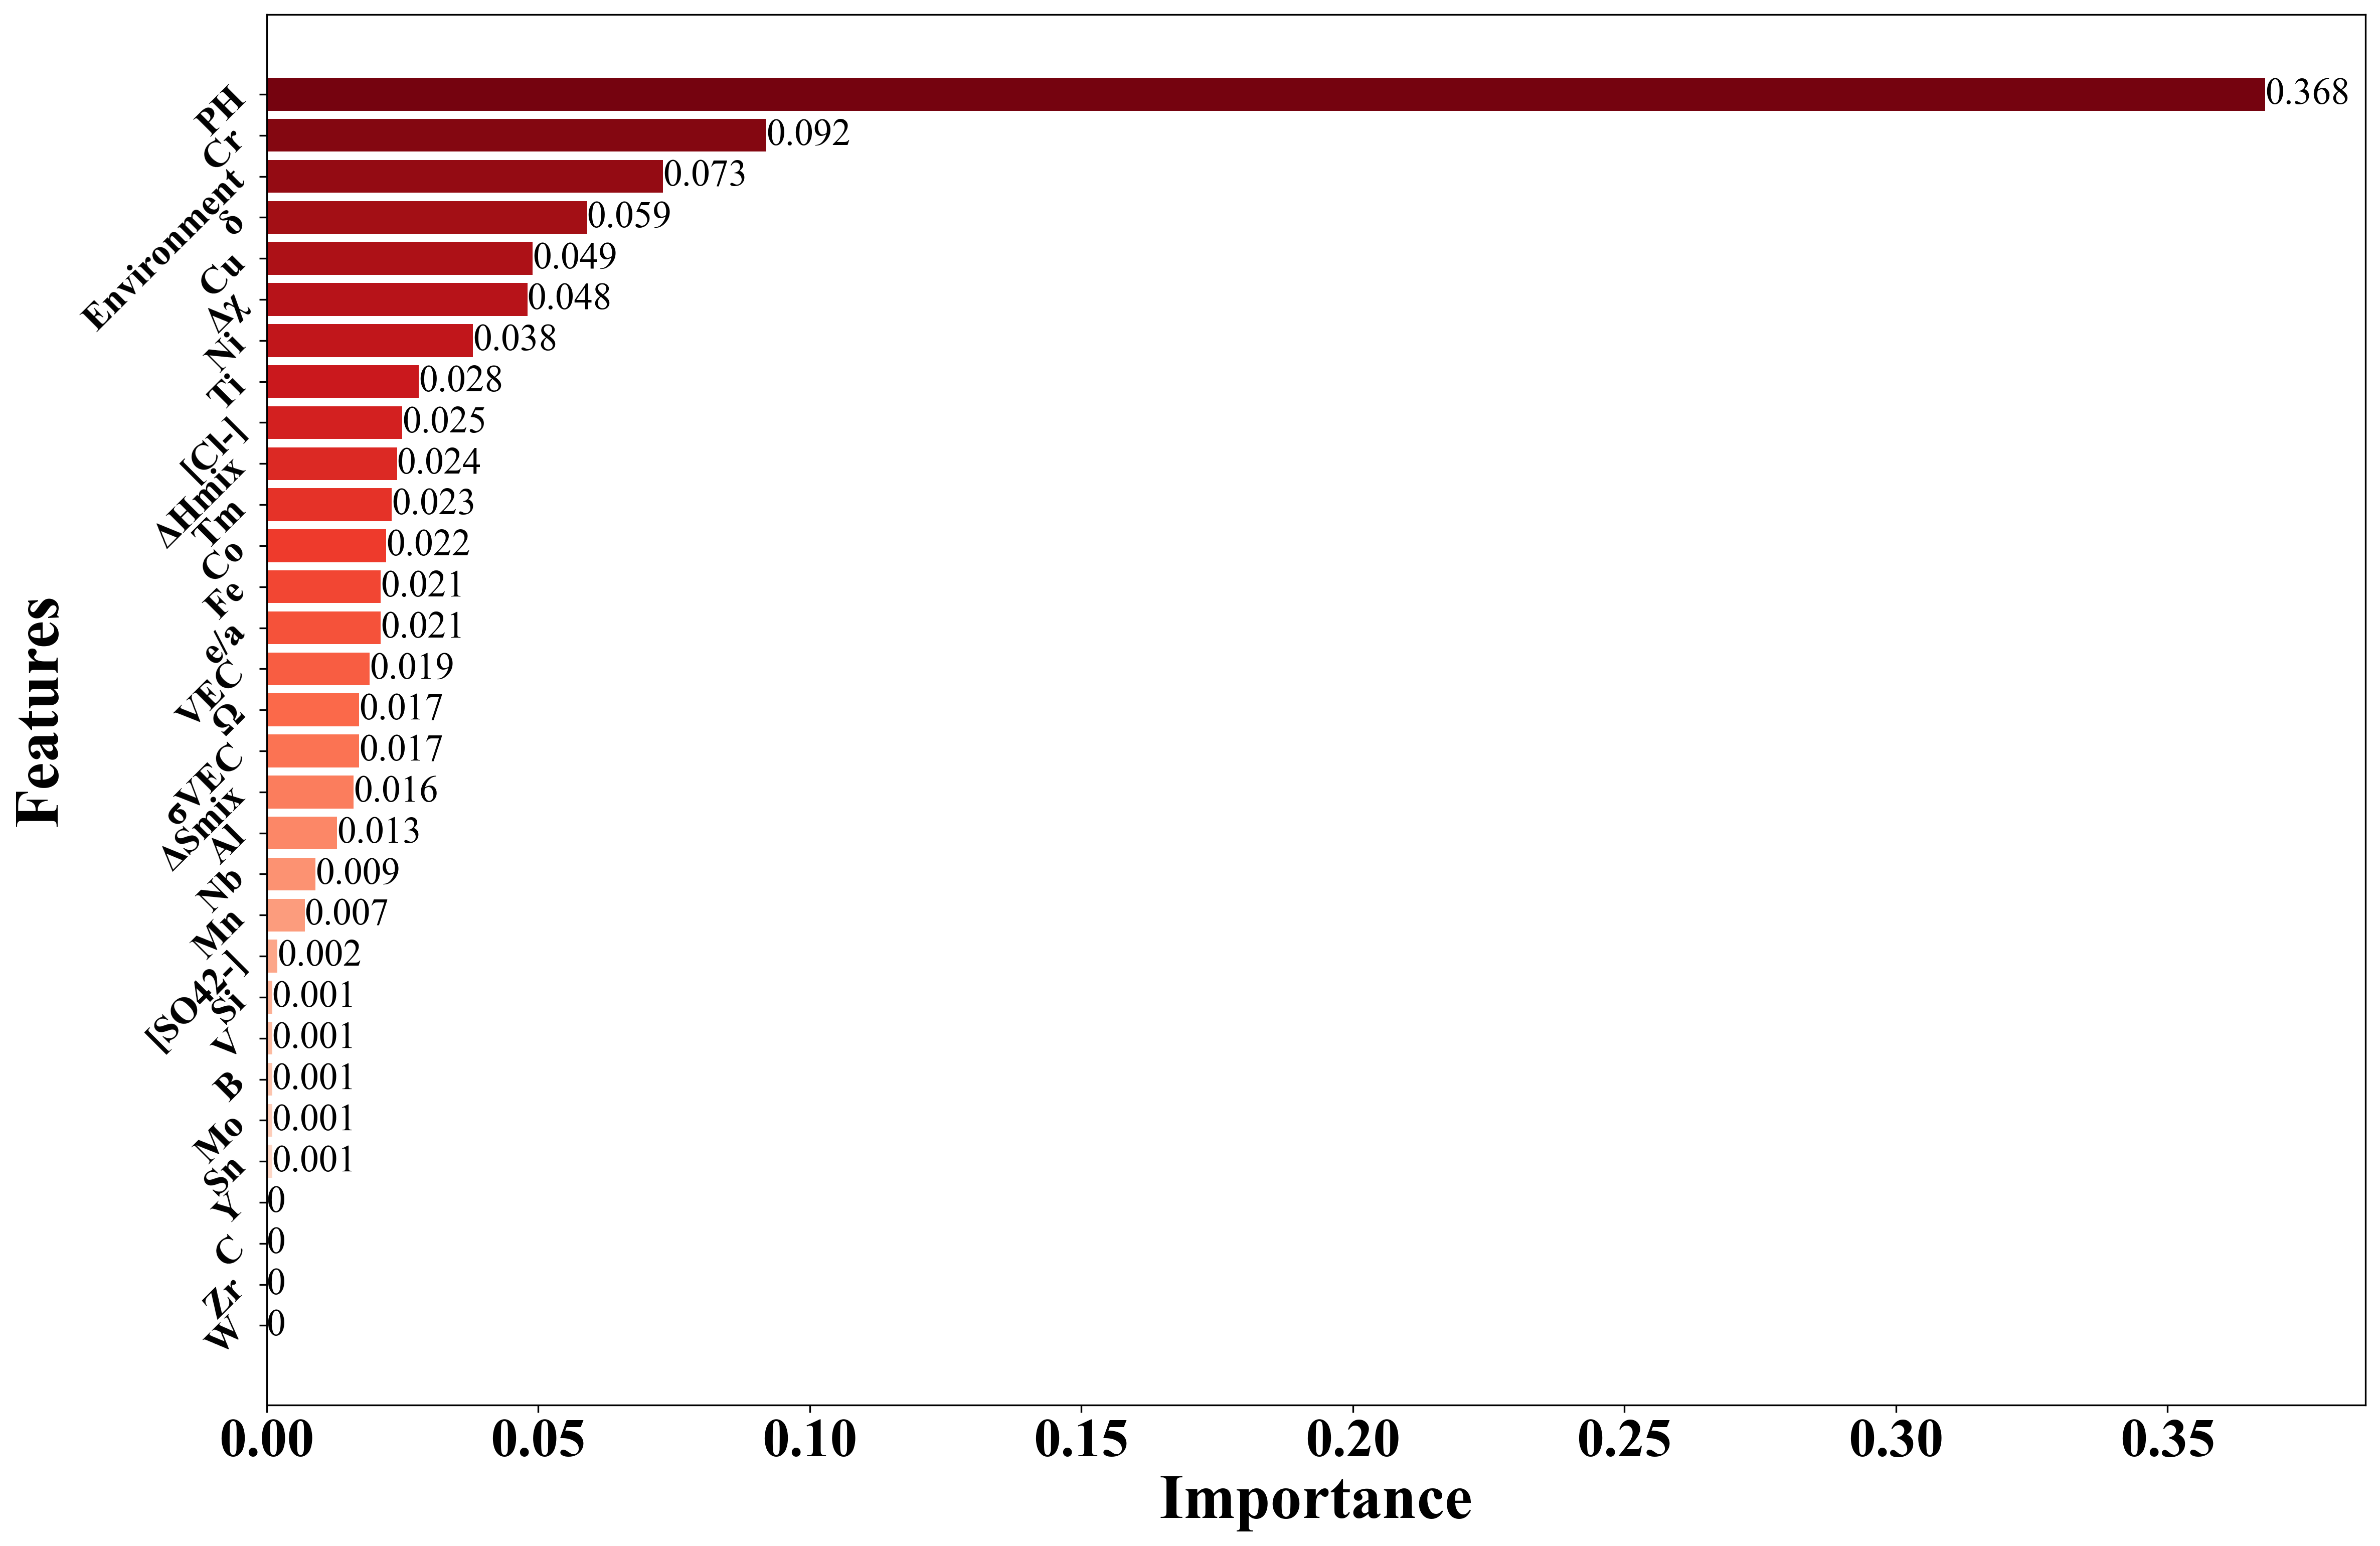

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


# 获取输入特征的名称
feature_names = dataset.columns[:-1]

rf = RandomForestRegressor()                               # 创建随机森林回归模型
c = rf.fit(X_train, y_train).feature_importances_    # 特征重要性
print("各特征的重要性分布：",c)

importances=pd.DataFrame(c,columns=['importance'])
feature_data=pd.DataFrame(feature_names,columns=['feature'])
importance=pd.concat([feature_data,importances],axis=1)
importance=importance.sort_values(['importance'],ascending=True)
values=np.around(importance['importance'].values,decimals=3)

# 创建红色渐变色调色板
red_palette = sns.color_palette("Reds", len(importance))

plt.figure(figsize=(18,12), dpi=300)
p1=plt.barh(importance['feature'],values,color=red_palette,label='values')
plt.bar_label(p1, label_type='edge',fontproperties={'family':'Times New Roman', 'weight':'normal', 'size':18})

plt.xlabel('Importance',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':30})
plt.ylabel('Features',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':30})

plt.xticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':26})
plt.yticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':18}, rotation=45)

# 移除图例
plt.legend().remove()
# plt.savefig("importance.png", dpi=300,format="png")
plt.show()

In [14]:
# 根据特征重要性分析结果，剔除一些特征参数
dataset = dataset.drop('Zr', axis=1)
dataset = dataset.drop('B', axis=1)
dataset = dataset.drop('C', axis=1)
dataset = dataset.drop('Mo', axis=1)
dataset = dataset.drop('Y', axis=1)
dataset = dataset.drop('W', axis=1)
dataset = dataset.drop('V', axis=1)
dataset = dataset.drop('Si', axis=1)
dataset = dataset.drop('Sn', axis=1)
dataset = dataset.drop('[SO42-]', axis=1)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 318
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  304 non-null    int64  
 1   PH           304 non-null    float64
 2   [Cl-]        304 non-null    float64
 3   VEC          304 non-null    float64
 4   σVEC         304 non-null    float64
 5   ΔSmix        304 non-null    float64
 6   ΔHmix        304 non-null    float64
 7   Ω            304 non-null    float64
 8   δ            304 non-null    float64
 9   Δχ           304 non-null    float64
 10  e/a          304 non-null    float64
 11  Tm           304 non-null    float64
 12  Al           304 non-null    float64
 13  Co           304 non-null    float64
 14  Cr           304 non-null    float64
 15  Fe           304 non-null    float64
 16  Ni           304 non-null    float64
 17  Cu           304 non-null    float64
 18  Ti           304 non-null    float64
 19  Mn      

# 对筛选后的所有特征再进行一次Pearson相关性分析

<Figure size 1000x800 with 0 Axes>

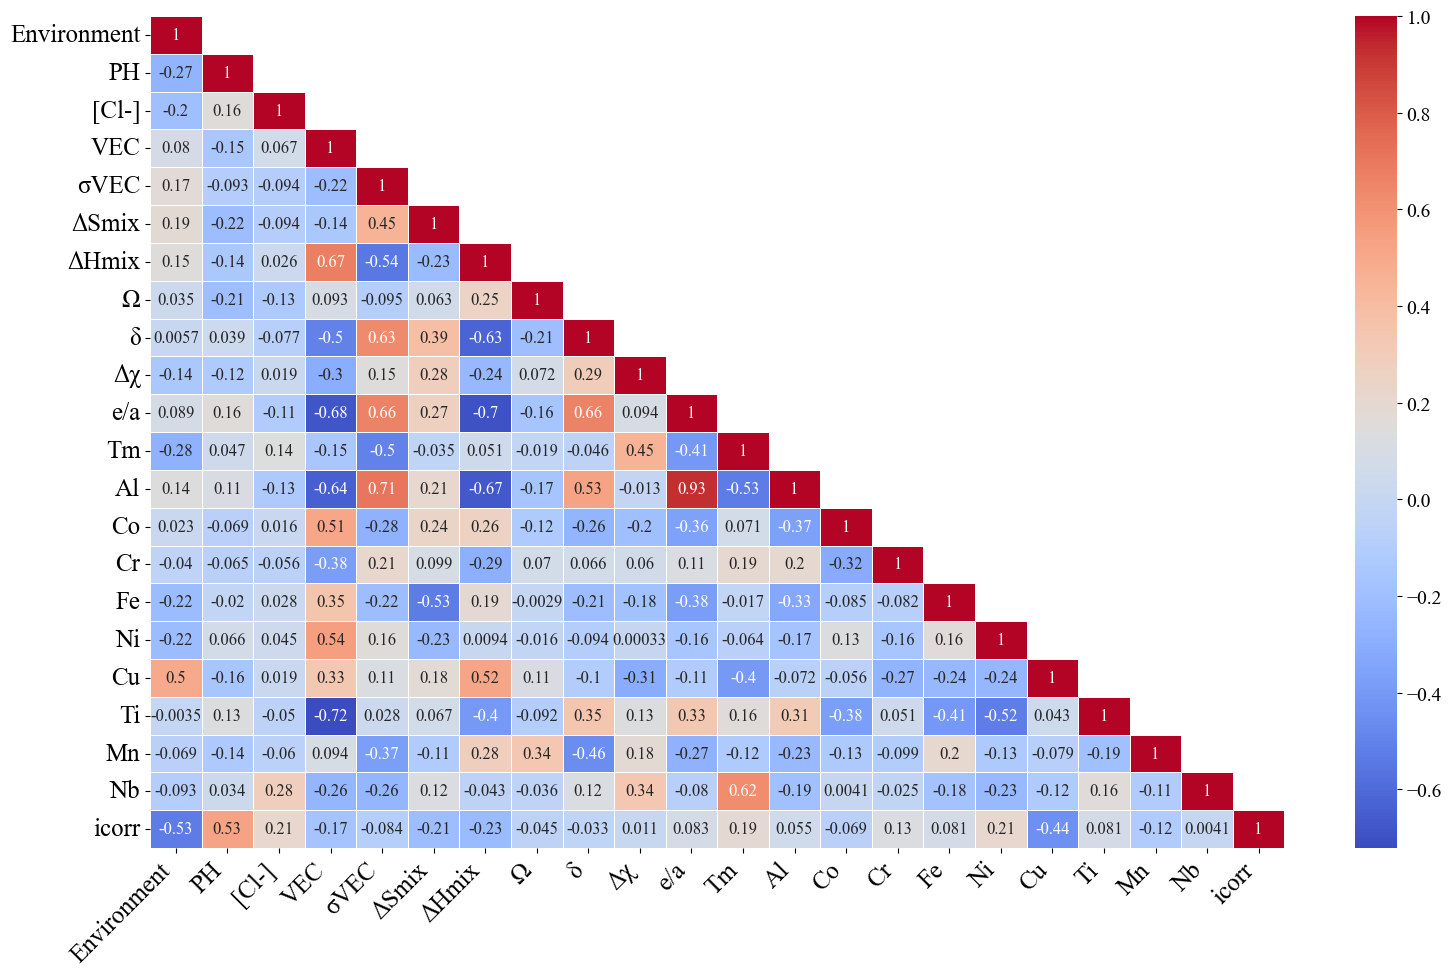

In [16]:
# 生成Pearson相关系数矩阵
P = dataset[['Environment', 'PH', '[Cl-]', 'VEC', 'σVEC', 'ΔSmix', 'ΔHmix', 'Ω', 'δ', 'Δχ', 'e/a', 'Tm', 'Al', 'Co', 
             'Cr', 'Fe', 'Ni', 'Cu', 'Ti', 'Mn', 'Nb', 'icorr']]
corr=P.corr(method='pearson')

# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# 生成一个和相关系数矩阵相同大小的矩阵，并把它的主对角线上的元素设为1
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# 绘制相关系数矩阵的热力图
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12}, mask=mask)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.tight_layout()
plt.show()

In [17]:
# 根据相关系数选择特征
threshold = 0.8  # 设置相关系数阈值
high_corr = np.where(abs(corr) > threshold)
high_corr = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print('Highly correlated features:', high_corr)

Highly correlated features: [('e/a', 'Al')]


In [18]:
dataset = dataset.drop('Al', axis=1)

# 递归消除法

In [19]:
from sklearn.model_selection import train_test_split


# 将数据分成X和y轴
y = dataset['icorr']
X = dataset.drop(['icorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150,
                                                    )

# 归一化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score


estimator = RandomForestRegressor()                               # 随机森林

print("递归特征消除法筛选最优特征组合")
score = []                                                            # 建立列表
for i in range(1, 21, 1):
    selector = RFE(estimator, n_features_to_select=i,step=1)
    selector = selector.fit(X_train, y_train) # 最优特征
    # 哪些特征入选最后特征，true表示入选
    print(selector.support_)
    # 每个特征的得分排名，特征得分越低（1最好），表示特征越好
    print(selector.ranking_)
    #  挑选了几个特征
    print(selector.n_features_)
    once = -cross_val_score(estimator,selector.fit_transform(X_train, y_train), y_train, cv=5, scoring='neg_mean_squared_error').mean()                      # 交叉验证
    score.append(once)                                                           # 交叉验证结果保存到列表
print(min(score), (score.index(min(score))*1)+1)               # 输出最优分类结果和对应的特征数量
print(score)

递归特征消除法筛选最优特征组合
[False False False False False False False False False  True False False
 False False False False False False False False]
[ 6  2 13 15 16 18  9 17  4  1 10  8 14  3 11  7  5 12 20 19]
1
[False  True False False False False False False False  True False False
 False False False False False False False False]
[ 5  1 12 15 16 17  7 14  3  1 10  8 13  2  9  6  4 11 19 18]
2
[False  True False False False False False False False  True False False
 False  True False False False False False False]
[ 4  1 10 11 14 16  7 15  2  1  9  6 13  1  8  5  3 12 18 17]
3
[False  True False False False False False False  True  True False False
 False  True False False False False False False]
[ 3  1 10 12 14 15  6 13  1  1  7  5 11  1  9  2  4  8 17 16]
4
[False  True False False False False False False  True  True False False
 False  True False False  True False False False]
[10  1  6  7 14 13  4 12  1  1  5  3 11  1  9  2  1  8 16 15]
5
[ True  True False False False False False False 

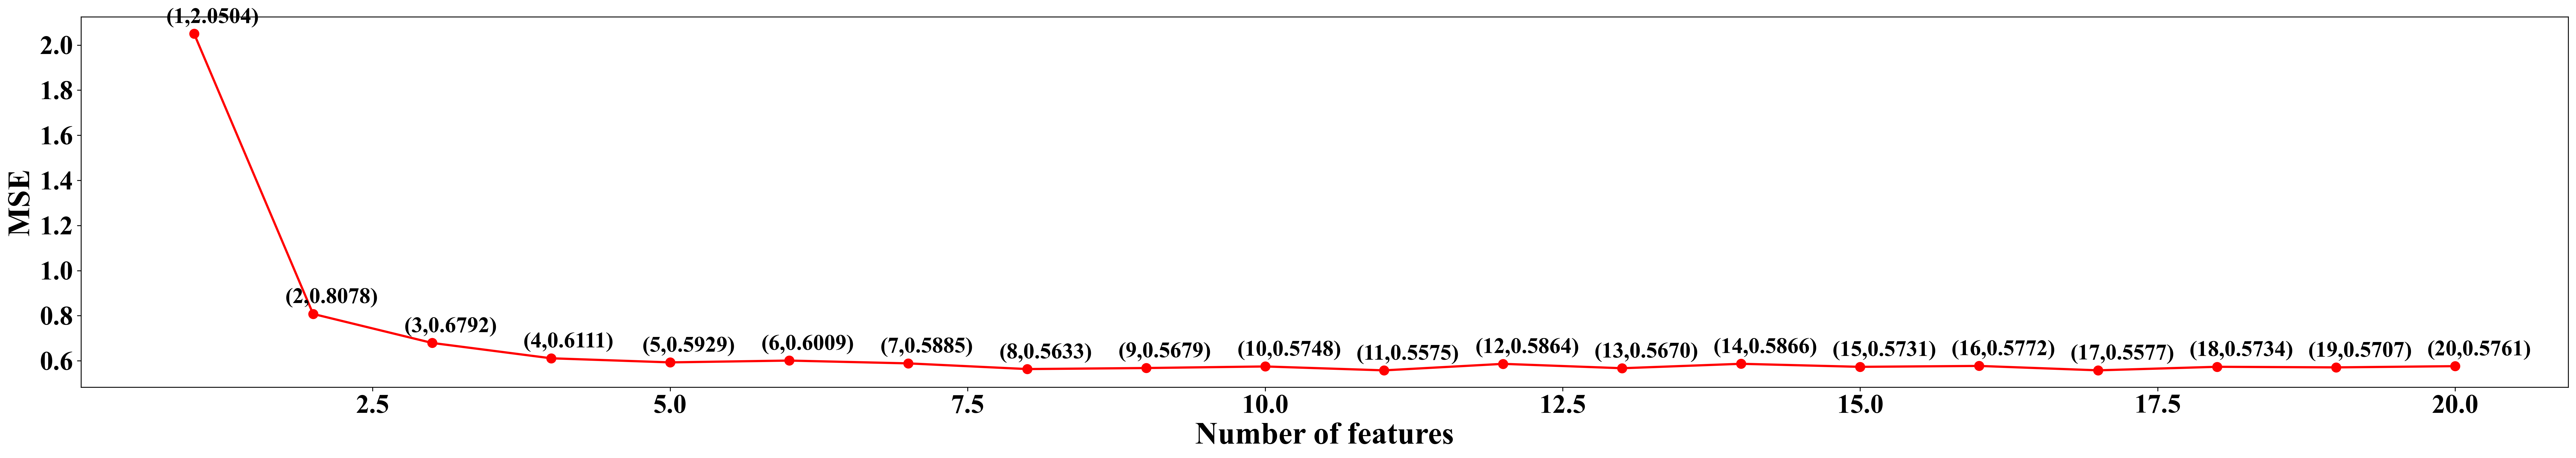

In [24]:
plt.figure(figsize=[40, 6], dpi=300)
plt.plot(range(1, 21, 1), score, marker='o', color='red', linewidth=2, markersize=8)

plt.xlabel('Number of features',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':28})
plt.ylabel('MSE',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':28})

for xy in zip(range(1, 21, 1), score):
    plt.annotate("(%s,%.4f)" % xy, xy=xy, xytext=(-25, 10),textcoords='offset points',weight='bold',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':20})

plt.xticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.yticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})

plt.show()

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 318
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  304 non-null    int64  
 1   PH           304 non-null    float64
 2   [Cl-]        304 non-null    float64
 3   VEC          304 non-null    float64
 4   σVEC         304 non-null    float64
 5   ΔSmix        304 non-null    float64
 6   ΔHmix        304 non-null    float64
 7   Ω            304 non-null    float64
 8   δ            304 non-null    float64
 9   Δχ           304 non-null    float64
 10  e/a          304 non-null    float64
 11  Tm           304 non-null    float64
 12  Co           304 non-null    float64
 13  Cr           304 non-null    float64
 14  Fe           304 non-null    float64
 15  Ni           304 non-null    float64
 16  Cu           304 non-null    float64
 17  Ti           304 non-null    float64
 18  Mn           304 non-null    float64
 19  Nb      

In [26]:
# 根据递归消除法结果，剔除一些特征参数
dataset = dataset.drop('VEC', axis=1)
dataset = dataset.drop('σVEC', axis=1)
dataset = dataset.drop('ΔSmix', axis=1)
dataset = dataset.drop('Ω', axis=1)
dataset = dataset.drop('Co', axis=1)
dataset = dataset.drop('Ti', axis=1)
dataset = dataset.drop('Mn', axis=1)
dataset = dataset.drop('Nb', axis=1)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  304 non-null    int64  
 1   PH           304 non-null    float64
 2   [Cl-]        304 non-null    float64
 3   ΔHmix        304 non-null    float64
 4   δ            304 non-null    float64
 5   Δχ           304 non-null    float64
 6   e/a          304 non-null    float64
 7   Tm           304 non-null    float64
 8   Cr           304 non-null    float64
 9   Fe           304 non-null    float64
 10  Ni           304 non-null    float64
 11  Cu           304 non-null    float64
 12  icorr        304 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 33.2 KB
